## Building A Network Intrustion Detector on KDD-90 Dataset
This is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and “good” normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

In [63]:
import pandas as pd

In [64]:
KDD_train=pd.read_csv('KDDTrain+.txt',sep=",",header=None)

In [65]:
KDD_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [66]:
KDD_train.shape[0]

125973

In [67]:
KDD_train.shape[1]

43

NSL KDD training set is a modified version of original KDD-90 dataset. It has 125972 rows and 42 columns, with each row representing a connection with either normal or one of other 22 attack types. One of the most important advantages NSL KDD set offers is that it removes duplicate records in the original KDD training set, which makes our analysis not biased towards the more frequent records and leads to a more reliable analysis.

In [68]:
KDD_train.columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label','level_difficulty']

Assign colunames to previous dataframe in order to clear out any confusion about this dataset.

In [69]:
KDD_train['level_difficulty'].head(10)

0    20
1    15
2    19
3    21
4    21
5    21
6    21
7    21
8    21
9    21
Name: level_difficulty, dtype: int64

In [70]:
level_1=KDD_train.loc[KDD_train['level_difficulty'].between(0,5),'level_difficulty'].size
level_2=KDD_train.loc[KDD_train['level_difficulty'].between(6,10),'level_difficulty'].size
level_3=KDD_train.loc[KDD_train['level_difficulty'].between(11,15),'level_difficulty'].size
level_4=KDD_train.loc[KDD_train['level_difficulty'].between(16,20),'level_difficulty'].size
level_5=KDD_train.loc[KDD_train['level_difficulty']==21,'level_difficulty'].size
l_series=[level_1,level_2,level_3,level_4,level_5]
total_count=sum(l_series)
feq_series=[level_1/total_count,level_2/total_count,level_3/total_count,level_4/total_count,level_5/total_count]

Dive into the dataset to find out how many events have been successfully detected by all machine learning techniques. Concatante all values into a list within 5 main categories. 

In [71]:
KDD_train['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

Find out all unique attack types from our training dataset

In [72]:
Dos=['back','neptune','smurf','teardrop','land','pod']
Probe=['satan','portsweep','ipsweep','nmap']
R2L=['warezmaster','warezclient','ftp_write','guess_passwd','imap','multihop','phf','spy']
U2R=['rootkit','buffer_overflow','loadmodule','perl']

In [73]:
for d in Dos:
    KDD_train.loc[KDD_train['label']==d,'label']='Dos'
for p in Probe:
     KDD_train.loc[KDD_train['label']==p,'label']='Probe'
for r in R2L:
     KDD_train.loc[KDD_train['label']==r,'label']='R2L'
for u in U2R:
     KDD_train.loc[KDD_train['label']==u,'label']='U2R'

Divide all unique attack types into 4 main categories, Denial of Service Attack (D0S), User to Root Attack (U2R), Remote to Local Attack (R2L), Probing Attack:

1) Denial   of   Service   Attack   (DoS):is  an  attack  inwhich the attacker makes some computing or memoryresource  too  busy  or  too  full  to  handle  legitimate  re-quests, or denies legitimate users access to a machine.

2)User  to  Root  Attack  (U2R):is  a  class  of  exploit  inwhich  the  attacker  starts  out  with  access  to  a  normaluser account on the system (perhaps gained by sniffingpasswords,  a  dictionary  attack,  or  social  engineering)and  is  able  to  exploit  some  vulnerability  to  gain  rootaccess to the system.

3)Remote  to  Local  Attack  (R2L):occurs  when  anattacker  who  has  the  ability  to  send  packets  to  amachine  over  a  network  but  who  does  not  have  anaccount on that machine exploits some vulnerability togain local access as a user of that machine.

4)Probing  Attack:is  an  attempt  to  gather  informationabout a network of computers for the apparent purposeof circumventing its security controls.

In [74]:
KDD_train['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

Allocate the entire training dataset into 5 categories and check if it works here.

In [75]:
def convert_col(data,col):
    data[col]=list(data[col].factorize())[0]

Map each category into a different integer

In [76]:
convert_col(KDD_train,'protocol_type')
convert_col(KDD_train,'service')
convert_col(KDD_train,'flag')

convert columns with string values to numeric values for the purpose of analysis

In [77]:
KDD_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,level_difficulty
0,0,0,0,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,1,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,2,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,0,0,3,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,3,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Check if the conversion has been successfully implemented on KDD_train set

In [78]:
KDD_train['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [79]:
KDD_train.loc[KDD_train['label']=='normal','label']=0
KDD_train.loc[KDD_train['label']=='Dos','label']=1
KDD_train.loc[KDD_train['label']=='U2R','label']=2
KDD_train.loc[KDD_train['label']=='R2L','label']=3
KDD_train.loc[KDD_train['label']=='Probe','label']=4

Manually sign labels to each category 

In [80]:
from sklearn.preprocessing import MinMaxScaler
nms=MinMaxScaler()
KDD_train_norm=nms.fit_transform(KDD_train.iloc[:,0:41])

## Mean-Scale Normalization
Feature normalization is an important and necessary activity in the domain of NIDS. By nature NSL-KDD data set features describe various characteristics of the data and the values are qualitative or quantitative with different ranges. These feature values influenced the data analysis or classification process. For example features with higher values can dominate the features with less value. The qualitative features are converted in the transformation step. Now the features are need to be normalized to eliminate such dominance by scaling them all within a specific range. In this paper for normalization process the mean-scale normalization technique is used here.

$x_i=\frac{x_i-min(x_i)}{max(x_i)-min(x_i)}$

Preprocess the training data with 40 selected features

In [81]:
Train_labels=KDD_train['label'].values

Assign numeric values to a new variable t_labels

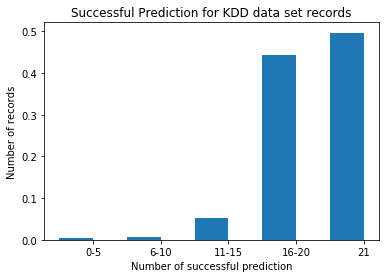

In [82]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols=['0-5','6-10','11-15','16-20','21']
bar_heights = feq_series
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols)

ax.set_xlabel('Number of successful prediction')
ax.set_ylabel('Number of records')
ax.set_title('Successful Prediction for KDD data set records')
plt.show()

The plot shows the relative frequency distribution across all the events in the KDD data set records. Based on this plot, most of events classified by machine learning techniques agree with the inherent labels provided by the author. It is because the interval 16-21 accounts for nearly 98% of events, indicating a extremely high successful prediction rate.

In [83]:
KDD_test=pd.read_csv('KDDTest+.txt',sep=",",header=None)

Import the NSL KDD test dataset and use pandas module to organize it into a dataframe.

In [84]:
KDD_test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [85]:
KDD_test.columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label','level_difficulty']

Like what we did previously, we assigned a list of column names to the test dataset in order to make our analysis more meaningful.

In [86]:
KDD_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'level_difficulty'],
      dtype='object')

Additional check to see if the test dataset has the correct column names

In [87]:
KDD_test['label'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

22 Different attack types that are grouped into 4 main categories.

In [88]:
KDD_test.shape[0]

22544

In [89]:
KDD_test.shape[1]

43

KDD_test set has 22544 unique events and 43 features.  

In [90]:
convert_col(KDD_test,'protocol_type')
convert_col(KDD_test,'service')
convert_col(KDD_test,'flag')

Convert the columns with string values to numerical values

In [91]:
KDD_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,level_difficulty
0,0,0,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,0,1,1,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,1,2,1,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,0,3,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [92]:
nms=MinMaxScaler()
KDD_test_norm=nms.fit_transform(KDD_test.iloc[:,0:41])

Perform the mean-scale normalization for test dataset to ensure the consistency of both training and test dataset

In [93]:
New_Dos=['back','neptune','smurf','teardrop','land','pod','apache2', 'mailbomb', 'processtable','udpstorm']
New_Probe=['satan','portsweep','ipsweep','nmap','mscan', 'saint']
New_R2L=['warezmaster','warezclient','ftp_write','guess_passwd','imap','multihop','phf','spy','sendmail','named','snmpgetattack','snmpguess','xlock','xsnoop','worm']
New_U2R=['rootkit','buffer_overflow','loadmodule','perl','httptunnel', 'ps', 'sqlattack', 'xterm']

Updated attack list with novel attacks from test dataset

In [94]:
for d in New_Dos:
    KDD_test.loc[KDD_test['label']==d,'label']='Dos'
for p in New_Probe:
     KDD_test.loc[KDD_test['label']==p,'label']='Probe'
for r in New_R2L:
     KDD_test.loc[KDD_test['label']==r,'label']='R2L'
for u in New_U2R:
     KDD_test.loc[KDD_test['label']==u,'label']='U2R'

Map label into four main attack types

In [95]:
KDD_test.loc[KDD_test['label']=='normal','label']=0
KDD_test.loc[KDD_test['label']=='Dos','label']=1
KDD_test.loc[KDD_test['label']=='U2R','label']=2
KDD_test.loc[KDD_test['label']=='R2L','label']=3
KDD_test.loc[KDD_test['label']=='Probe','label']=4

In [96]:
KDD_test['label'].unique()


array([1, 0, 4, 3, 2])

Double check the test set has exactly 5 main attack types 

In [97]:
KDD_test['label'].head()

0    1
1    1
2    0
3    4
4    4
Name: label, dtype: int64

In [98]:
Test_labels=KDD_test['label'].values

## In the next portion, we are going to explore some of widely  used machine learning techniques in hope of finding any useful patterns in the dataset

In [99]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [100]:
from sklearn.svm import SVC 
svm_model_rbf = SVC(kernel = 'rbf', C = 1, gamma='auto').fit(KDD_train_norm, Train_labels) 
svm_predictions = svm_model_rbf.predict(KDD_test_norm) 

/home/linxing/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
Fit the svm model to our training dataset

In [101]:
accuracy_svm = svm_model_rbf.score(KDD_test_norm, Test_labels) 

In [102]:
accuracy_svm

0.6660752306600426

accuracy of SVM on testing dataset is nearly 67%

In [103]:
svm_model_rbf.score(KDD_train_norm, Train_labels) 

0.9718987402062347

accuracy of SVM on training dataset is approximately 97%.

The high discrency, (nearly 32%) between training and testing accuracy suggests there might be a overfitting problem in our model. So we need to consider several techniques to address this issue, including:

1) Collect more Training Data

2) Introduce a penalty for complexity via regularization

3) Choose a simpler method with fewer parameters

4) Reduce the dimensionality for the data 

In [104]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(KDD_train_norm, Train_labels) 
gnb_predictions = gnb.predict(KDD_test_norm) 
  
# accuracy on X_test 
accuracy_nb = gnb.score(KDD_test_norm, Test_labels) 

In [105]:
accuracy_nb

0.4638041163946061

In [106]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(KDD_train_norm, Train_labels) 
  
# accuracy on X_test 
accuracy_knn = knn.score(KDD_test_norm, Test_labels) 

In [220]:
accuracy_knn

0.6929116394606104

In [107]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'